<a href="https://colab.research.google.com/github/brighamfrandsen/econ484/blob/master/examples/trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
!git clone https://github.com/brighamfrandsen/econ484.git
%cd econ484/utilities
from preamble import *
%cd ../data

fatal: destination path 'econ484' already exists and is not an empty directory.
/content/econ484/utilities
/content/econ484/data


### Decision trees

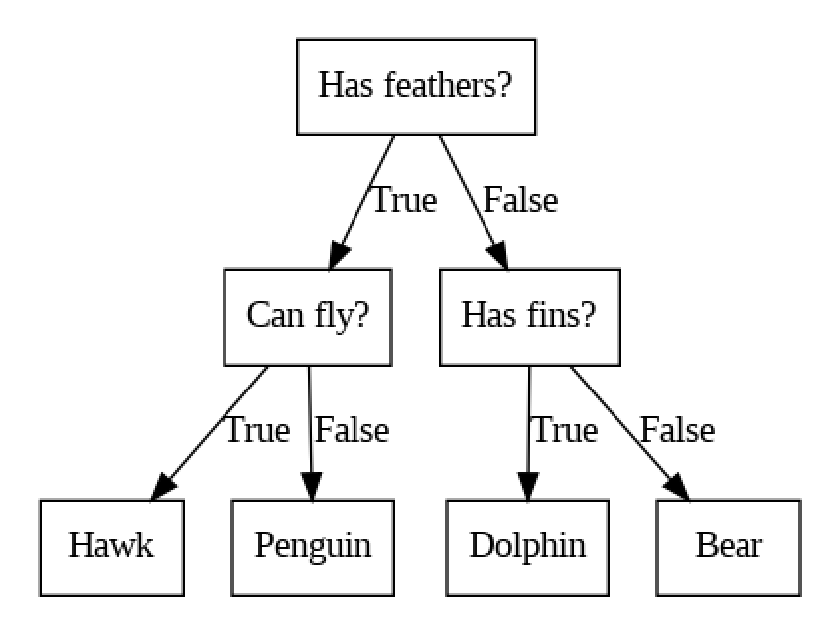

In [2]:
mglearn.plots.plot_animal_tree()

##### Building decision trees

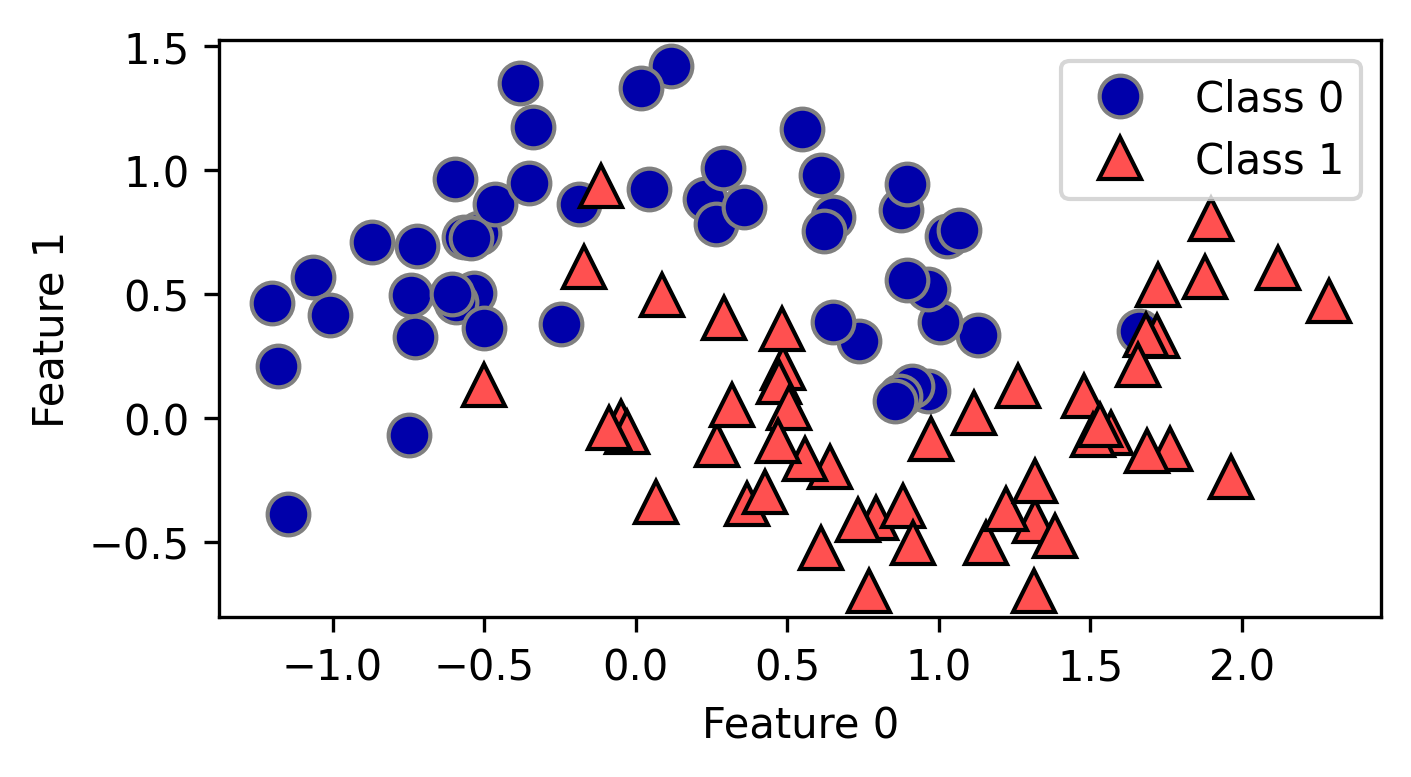

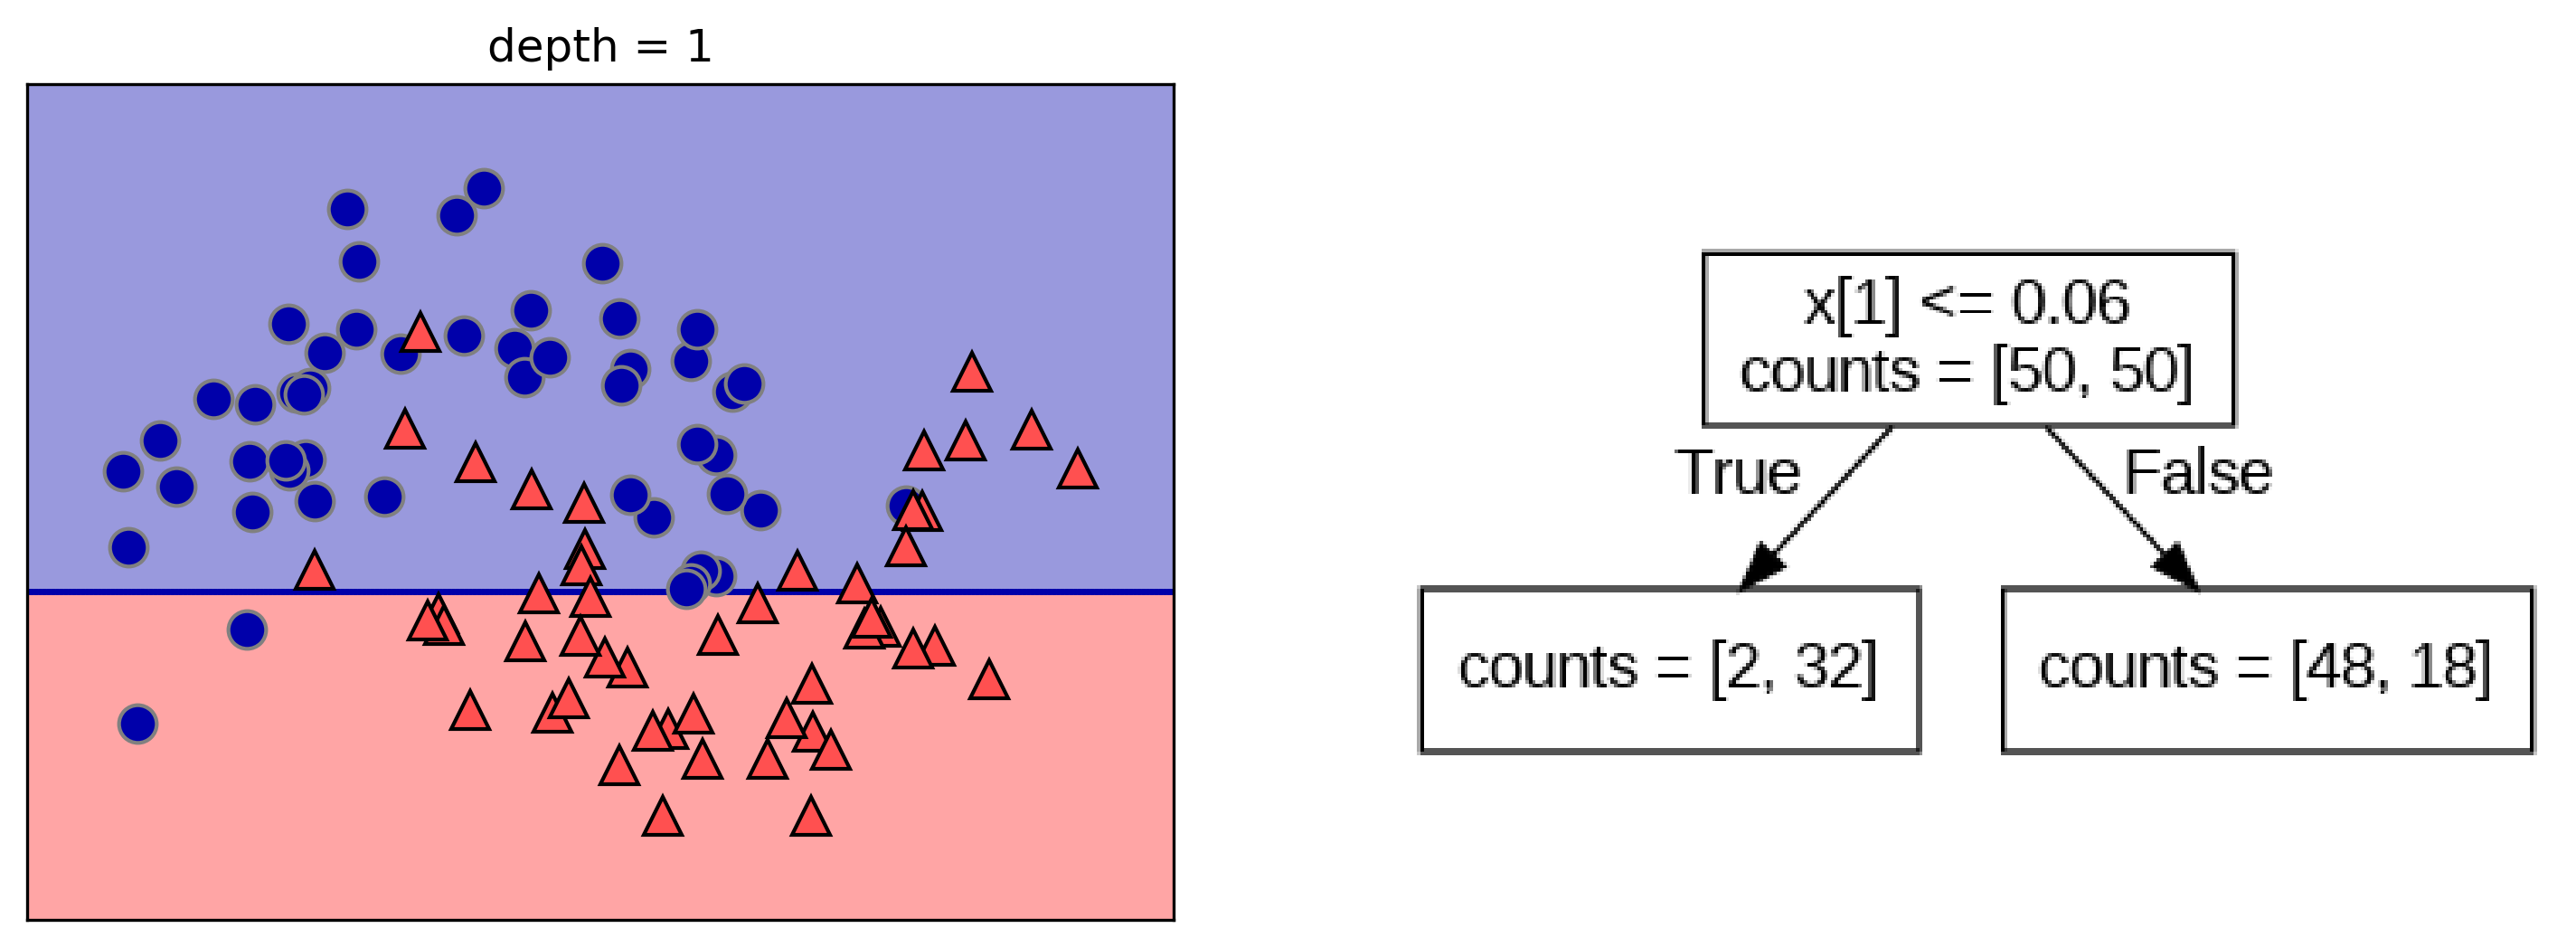

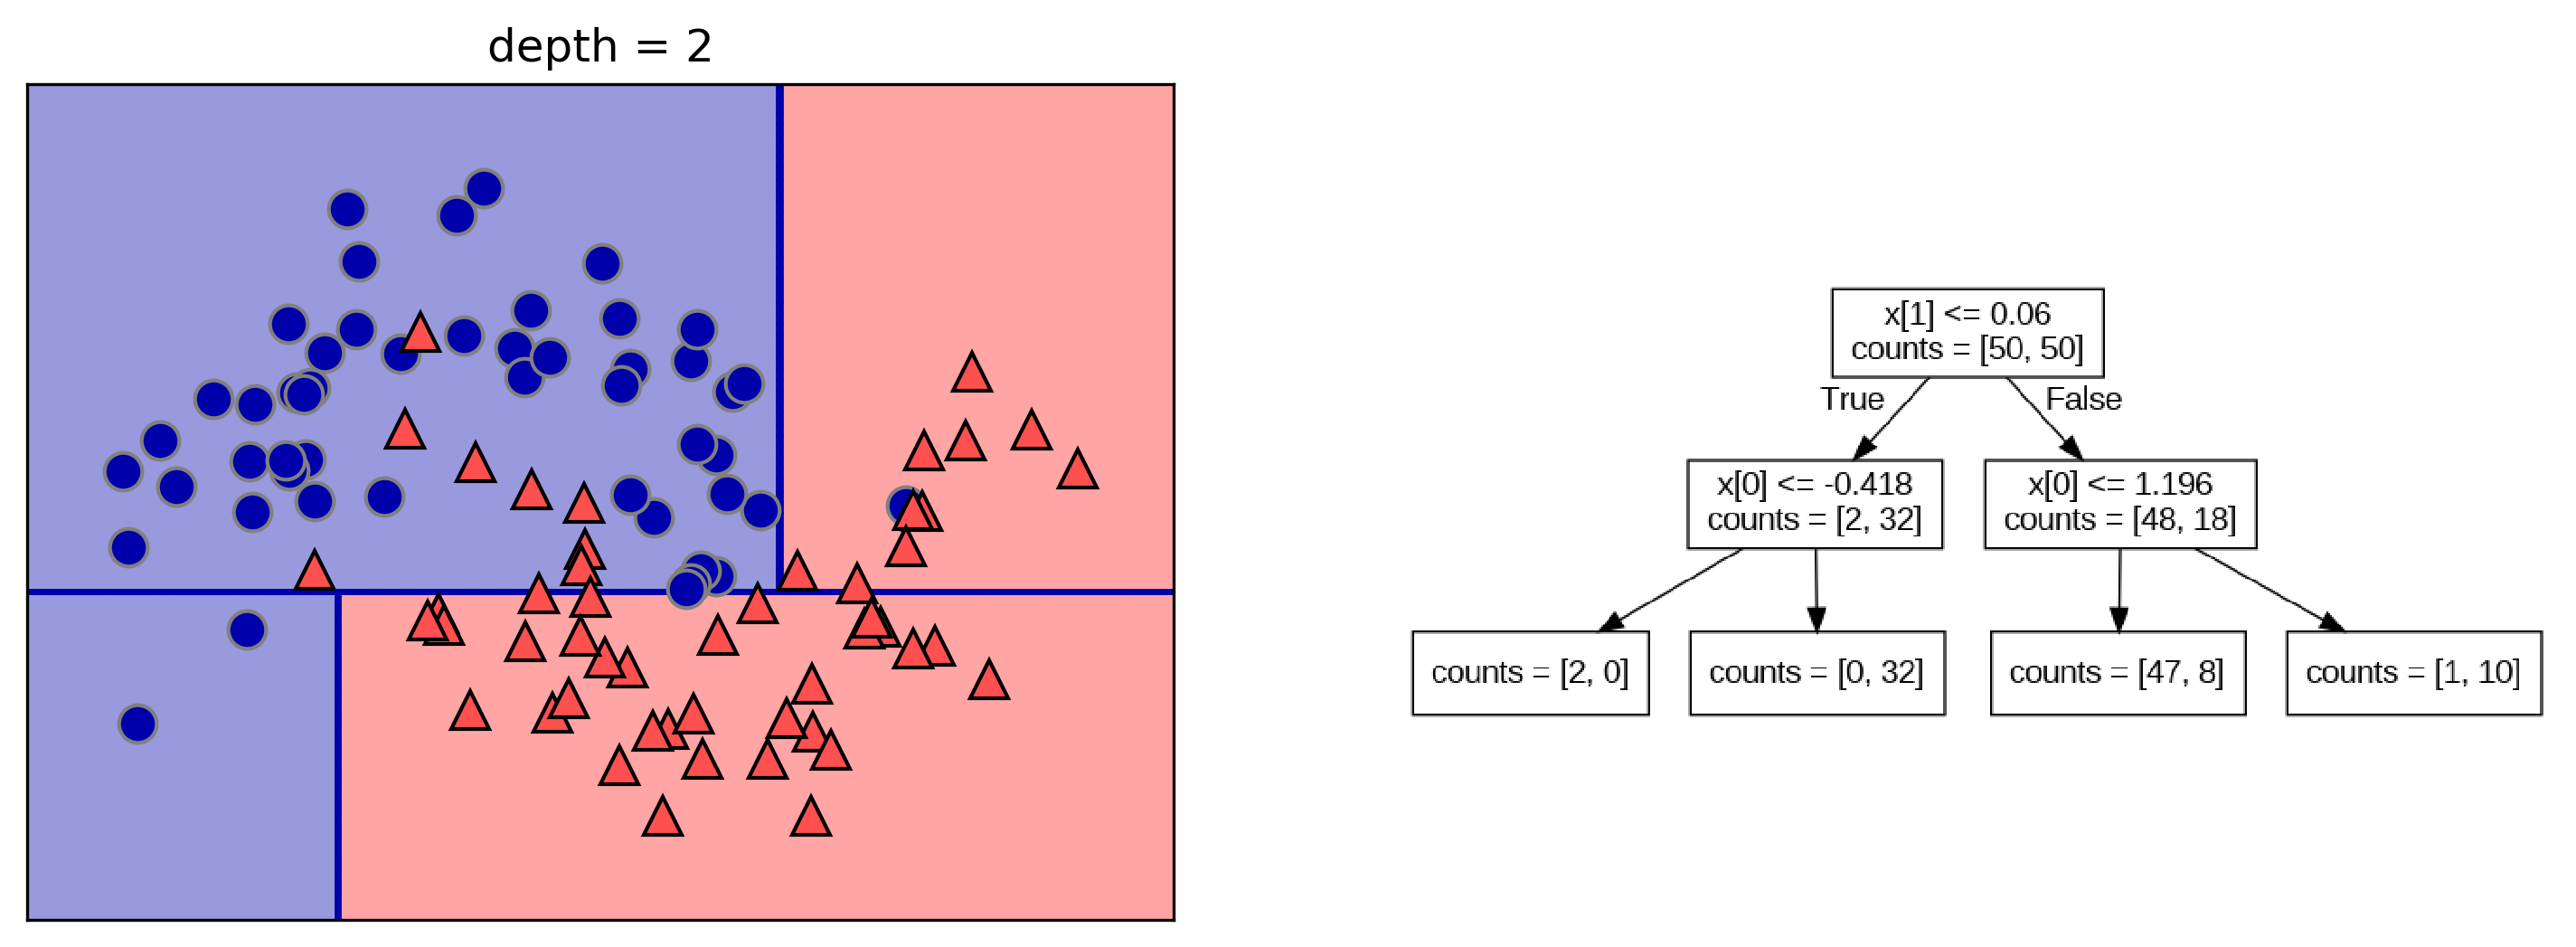

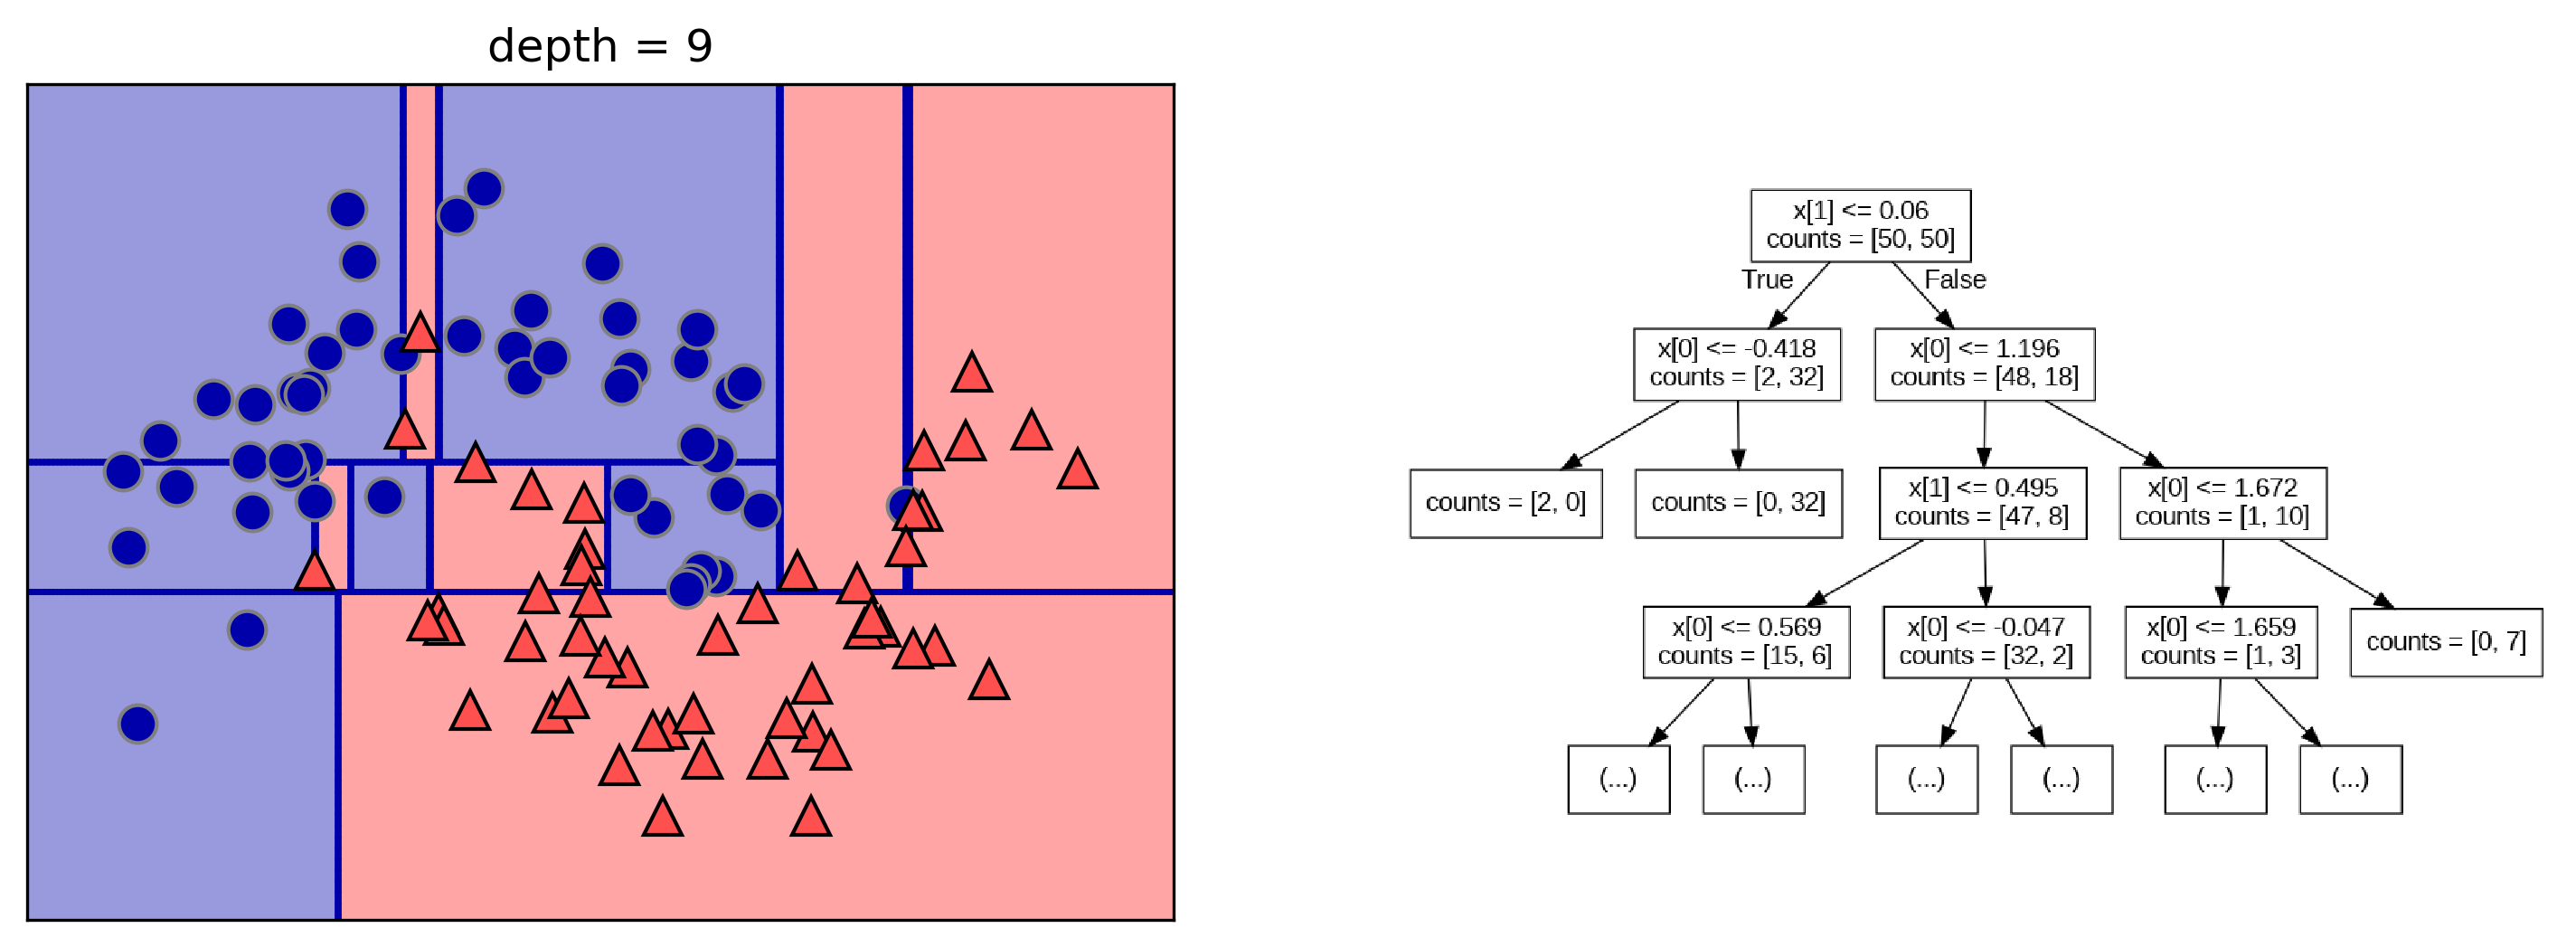

In [3]:
mglearn.plots.plot_tree_progressive()

##### Controlling complexity of decision trees

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [5]:
tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf = 10,random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.5f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.5f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.94836
Accuracy on test set: 0.91608


In [6]:
# On your own: use Grid Search CV to choose parameters

#### Analyzing Decision Trees

In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

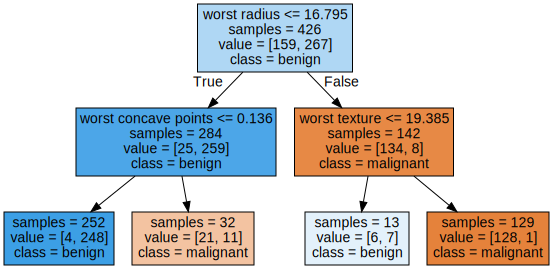

In [8]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

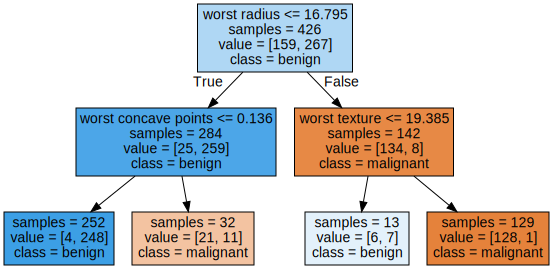

In [9]:
dot_data= export_graphviz(tree, out_file=None, class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
graph = graphviz.Source(dot_data)
graph

#### Feature Importance in trees

In [10]:
print("Feature importances:")
print(tree.feature_importances_)
print(cancer.feature_names)

Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.822 0.039 0.    0.
 0.    0.    0.    0.138 0.    0.   ]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


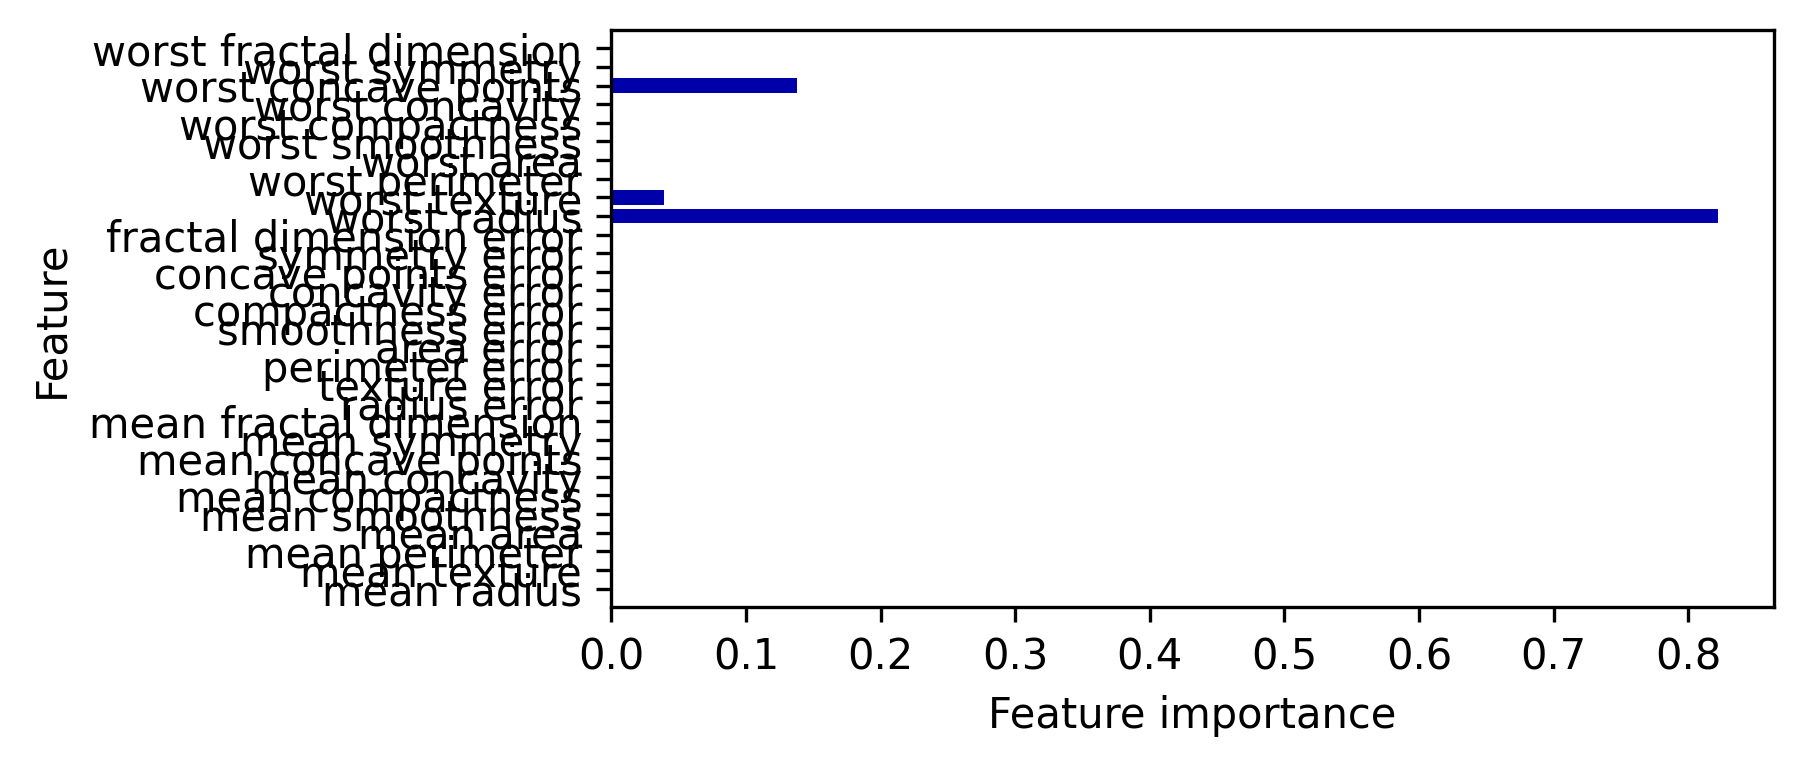

In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


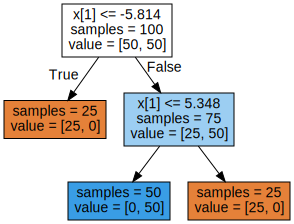

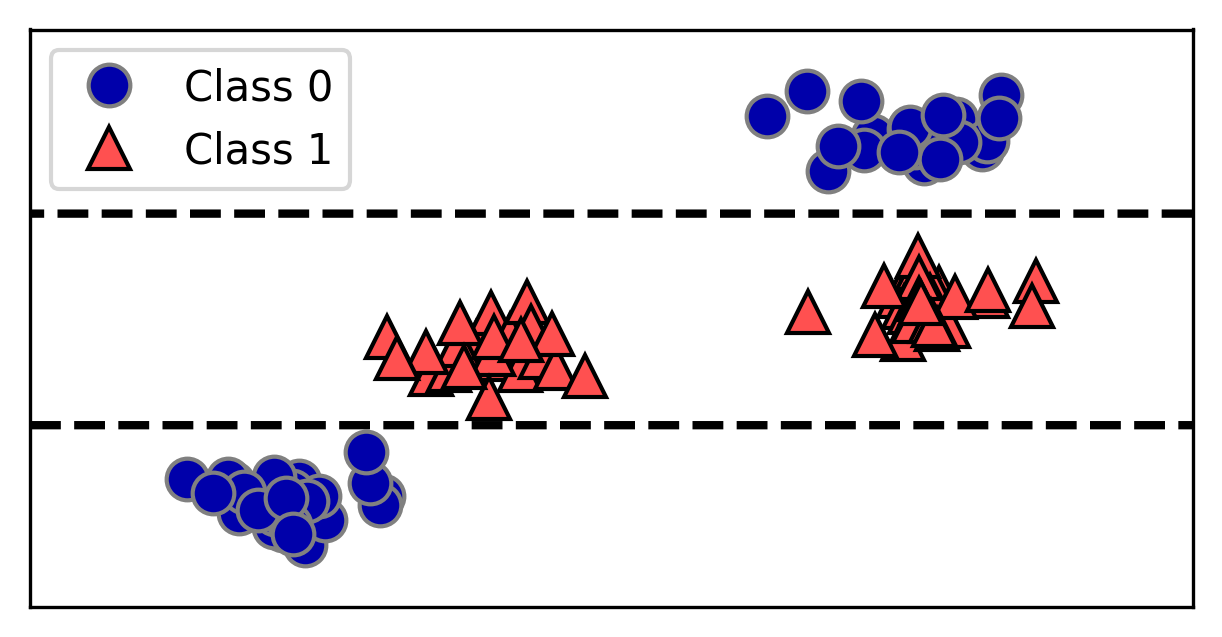

In [12]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

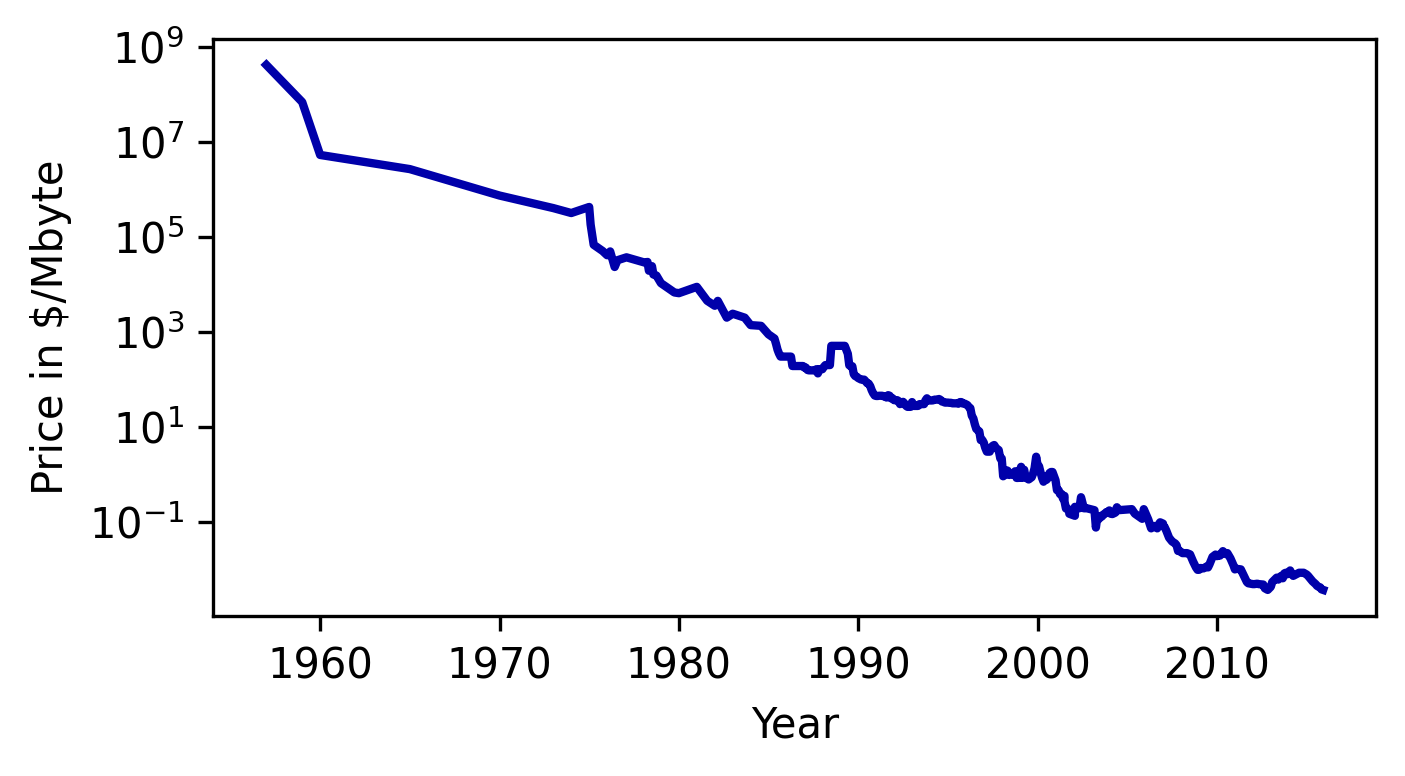

In [13]:
import os
ram_prices = pd.read_csv('ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date.values[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date.values[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

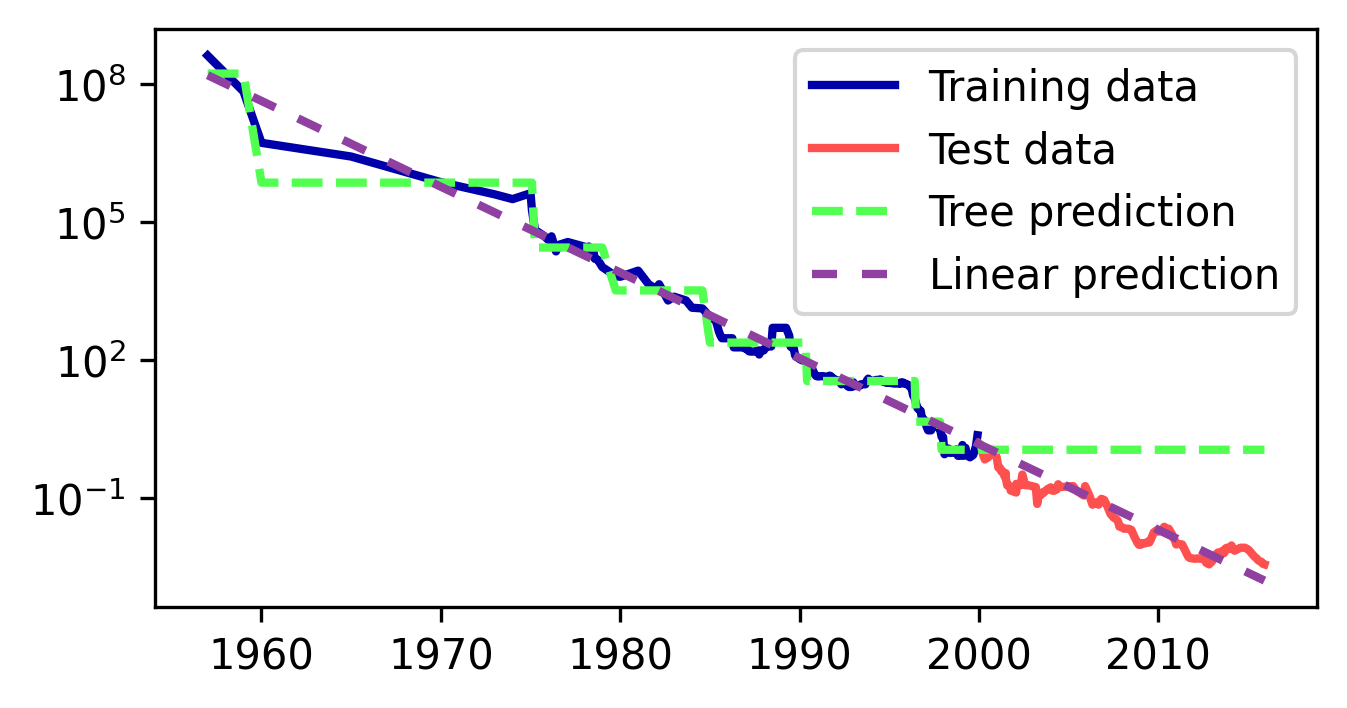

In [15]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

Now load the mortgage application data from last time, and compare a decision tree to logistic regression, using the ROC AUC on the test set as the criterion